In [1]:
'''!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install pip install opencv-python
!pip install opencv-python
!pip install tensorflow
!pip install pydot'''


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import cv2
import glob
import os
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [2]:
dt = pd.read_excel("COVID.metadata.xlsx")

In [3]:
print(dt)




       FILE NAME FORMAT     SIZE  \
0        COVID-1    PNG  256*256   
1        COVID-2    PNG  256*256   
2        COVID-3    PNG  256*256   
3        COVID-4    PNG  256*256   
4        COVID-5    PNG  256*256   
...          ...    ...      ...   
3611  COVID-3612    PNG  256*256   
3612  COVID-3613    PNG  256*256   
3613  COVID-3614    PNG  256*256   
3614  COVID-3615    PNG  256*256   
3615  COVID-3616    PNG  256*256   

                                                    URL  
0     https://sirm.org/category/senza-categoria/covi...  
1     https://sirm.org/category/senza-categoria/covi...  
2     https://sirm.org/category/senza-categoria/covi...  
3     https://sirm.org/category/senza-categoria/covi...  
4     https://sirm.org/category/senza-categoria/covi...  
...                                                 ...  
3611  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3612  https://bimcv.cipf.es/bimcv-projects/bimcv-cov...  
3613  https://bimcv.cipf.es/bimcv-projects/bi

In [4]:
dt2 = pd.read_excel("Lung_Opacity.metadata.xlsx")

In [5]:
print(dt2)


              FILE NAME FORMAT     SIZE  \
0        Lung_Opacity-1    PNG  256*256   
1        Lung_Opacity-2    PNG  256*256   
2        Lung_Opacity-3    PNG  256*256   
3        Lung_Opacity-4    PNG  256*256   
4        Lung_Opacity-5    PNG  256*256   
...                 ...    ...      ...   
6007  Lung_Opacity-6008    PNG  256*256   
6008  Lung_Opacity-6009    PNG  256*256   
6009  Lung_Opacity-6010    PNG  256*256   
6010  Lung_Opacity-6011    PNG  256*256   
6011  Lung_Opacity-6012    PNG  256*256   

                                                    URL  
0     https://www.kaggle.com/c/rsna-pneumonia-detect...  
1     https://www.kaggle.com/c/rsna-pneumonia-detect...  
2     https://www.kaggle.com/c/rsna-pneumonia-detect...  
3     https://www.kaggle.com/c/rsna-pneumonia-detect...  
4     https://www.kaggle.com/c/rsna-pneumonia-detect...  
...                                                 ...  
6007  https://www.kaggle.com/c/rsna-pneumonia-detect...  
6008  https://www.k

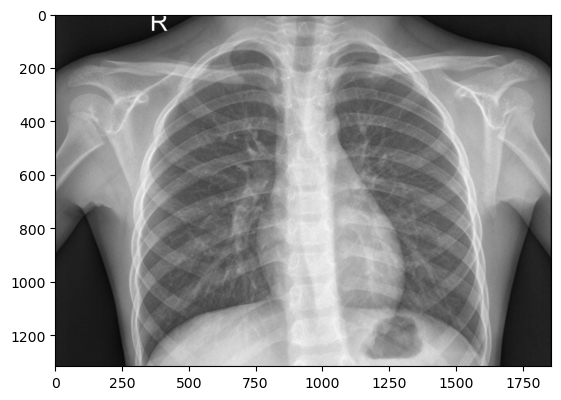

In [6]:
image=cv2.imread("IM-0001-0001.jpeg")

from matplotlib import pyplot as plt
plt.imshow(image)
 

In [49]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from skimage.feature import graycomatrix, graycoprops
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [51]:
train_dir = 'C:/Users/kavin/OneDrive/Desktop/documents/Data/train/*'
test_dir = 'C:/Users/kavin/OneDrive/Desktop/documents/Data/test/*'
train2_covid_dir = 'C:/Users/kavin/OneDrive/Desktop/documents/COVID-19_Radiography_Dataset/COVID/*'

In [53]:
SIZE = 140
BATCH_SIZE = 64
TARGET_SIZE = (SIZE,SIZE)
EPOCH_NUM = 10

In [55]:
categories_dict = {
  2: "PNEUMONIA",
  1: "NORMAL",
  0: "COVID19"
}


In [57]:
train_images = []
train_labels = [] 
label = 0

#Importing the first training dataset

for directory_path in glob.glob(train_dir):
    assert categories_dict[label] == os.path.normpath(directory_path).split(os.path.sep)[-1]
    print(categories_dict[label])
    counter = 1
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        if(counter%200==0): print(counter,"images loaded")
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, TARGET_SIZE)
        train_images.append(img)
        train_labels.append(label)
        counter+=1
        if(counter%1500==0): break
    
    print(counter,"images loaded")
    label +=1
    
#Importing the additional training dataset

print("additional",categories_dict[2],"data")    
addit_counter = 1
for img_path in glob.glob(os.path.join(train2_covid_dir, "*.png")):
    if(addit_counter%200==0): print(addit_counter,"images loaded")
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, TARGET_SIZE)
    train_images.append(img)
    train_labels.append(2)
    addit_counter+=1
    if(addit_counter%1000==0): break
print(addit_counter,"images loaded")

x_train = np.array(train_images)
y_train = to_categorical(train_labels, 3)
  

COVID19
200 images loaded
400 images loaded
461 images loaded
NORMAL
200 images loaded
400 images loaded
600 images loaded
800 images loaded
1000 images loaded
1200 images loaded
1267 images loaded
PNEUMONIA
200 images loaded
400 images loaded
600 images loaded
800 images loaded
1000 images loaded
1200 images loaded
1400 images loaded
1500 images loaded
additional PNEUMONIA data
200 images loaded
400 images loaded
600 images loaded
800 images loaded
1000 images loaded


In [59]:

test_images = []
test_labels = []
label = 0

#importing the testing dataset

for directory_path in glob.glob(test_dir):
    assert categories_dict[label] == os.path.normpath(directory_path).split(os.path.sep)[-1]
    print(categories_dict[label])
    counter = 1
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        if(counter%100==0): print(counter, "images loaded")
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, TARGET_SIZE)
        test_images.append(img)
        test_labels.append(label)
        counter+=1
    
    print(counter,"images loaded")
    label +=1

test_images = np.array(test_images)
test_labels = to_categorical(test_labels, 3)

COVID19
100 images loaded
117 images loaded
NORMAL
100 images loaded
200 images loaded
300 images loaded
318 images loaded
PNEUMONIA
100 images loaded
200 images loaded
300 images loaded
400 images loaded
500 images loaded
600 images loaded
700 images loaded
800 images loaded
856 images loaded


In [60]:
train_test_split(train_images, train_labels)
train_images, val_images, train_labels, val_labels = train_test_split(x_train, y_train, test_size=0.15, random_state=69)

In [61]:
print("train:",train_images.shape[0],", test:",test_images.shape[0],", val:",val_images.shape[0])

train: 3590 , test: 1288 , val: 634


In [65]:
def feature_extractor(images):
    image_dataset = pd.DataFrame()
    for image in images:   
        df = pd.DataFrame()
        
        #greycomatrix(image, distances, angles, levels=256, symmetric=False, normed=False)
        #distances - List of pixel pair distance offsets.
        #angles - List of pixel pair angles in radians.
        
        #5 configuration for the grey-level co-occurrence matrix calculation
        dists = [[1],[3],[5],[3],[3]]
        angles = [[0],[0],[0],[np.pi/4],[np.pi/2]]
        
        for n ,(dist, angle) in enumerate(zip(dists, angles)):
        
            GLCM = graycomatrix(image, dist, angle)       
            GLCM_Energy = graycoprops(GLCM, 'energy')[0]
            df['Energy'+str(n)] = GLCM_Energy
            GLCM_corr = graycoprops(GLCM, 'correlation')[0]
            df['Corr'+str(n)] = GLCM_corr       
            GLCM_diss = graycoprops(GLCM, 'dissimilarity')[0]
            df['Diss_sim'+str(n)] = GLCM_diss       
            GLCM_hom = graycoprops(GLCM, 'homogeneity')[0]
            df['Homogen'+str(n)] = GLCM_hom       
            GLCM_contr = graycoprops(GLCM, 'contrast')[0]
            df['Contrast'+str(n)] = GLCM_contr

        image_dataset = pd.concat([image_dataset, df], ignore_index=True)
        
    return image_dataset

In [67]:
train_extr_features = feature_extractor(train_images)

In [68]:
test_extr_features = feature_extractor(test_images)

In [69]:
val_extr_features = feature_extractor(val_images)

In [70]:
type(train_images)
# convert from integers to floats
train_images_norm = train_images.astype('float32')
test_images_norm = test_images.astype('float32')
val_images_norm = val_images.astype('float32')
# normalize to the range 0-1
train_images_norm /= 255.0
test_images_norm /= 255.0
val_images_norm /= 255.0

In [71]:
pd.set_option("display.max_columns", None)
train_extr_features

,Energy0,Corr0,Diss_sim0,Homogen0,Contrast0,Energy1,Corr1,Diss_sim1,Homogen1,Contrast1,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,Energy3,Corr3,Diss_sim3,Homogen3,Contrast3,Energy4,Corr4,Diss_sim4,Homogen4,Contrast4
0,0.028209,0.955000,8.812127,0.176118,311.779856,0.016006,0.875018,18.717310,0.088903,816.788321,0.012763,0.763210,26.675132,0.059078,1462.929312,0.020117,0.904030,15.720227,0.106036,645.937303,0.032123,0.938485,12.186757,0.159011,439.086340
1,0.079998,0.979443,6.743371,0.321765,207.770606,0.064439,0.906563,15.258811,0.208063,908.000730,0.054902,0.805269,22.657354,0.154579,1814.760635,0.063882,0.929664,13.914146,0.210995,685.983669,0.069975,0.955309,11.444004,0.231468,454.826486
2,0.017903,0.962809,7.519784,0.172182,186.576824,0.014258,0.902625,15.067518,0.095029,488.292127,0.012958,0.822634,21.364762,0.071786,891.145079,0.015126,0.919047,12.931317,0.104655,402.223377,0.017254,0.952084,9.346924,0.151224,238.287800
3,0.081102,0.950057,12.074101,0.168263,393.438232,0.058651,0.850387,23.408603,0.101929,1139.753337,0.042313,0.755004,31.294921,0.074284,1807.268254,0.067653,0.888099,20.070783,0.118117,861.985297,0.090619,0.923229,16.183003,0.163275,611.168926
4,0.044440,0.973079,7.750822,0.245726,252.776927,0.030600,0.906969,17.191554,0.138097,819.520959,0.022403,0.807032,25.396085,0.091961,1587.280317,0.035269,0.936050,14.663726,0.153173,582.204474,0.047656,0.966826,10.400834,0.200931,321.000521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,0.089717,0.992813,5.483607,0.348306,95.081346,0.075139,0.955203,14.753233,0.218489,585.188060,0.064173,0.896080,23.275132,0.171460,1340.536508,0.076897,0.975182,11.097931,0.243169,323.760292,0.077815,0.978790,9.534880,0.268230,284.080448
3586,0.044430,0.956636,2.892549,0.403492,36.212179,0.031591,0.875657,5.499791,0.234266,104.620855,0.027809,0.847949,6.939683,0.178399,128.268360,0.032679,0.882635,5.126076,0.242771,96.830445,0.034822,0.913268,4.720594,0.258093,71.507873
3587,0.096710,0.971221,9.434635,0.201268,235.127749,0.071396,0.883126,20.467153,0.130072,923.001043,0.047843,0.768858,29.649524,0.088954,1763.552698,0.083013,0.910371,18.109221,0.141772,716.337114,0.105910,0.934466,14.419812,0.187529,541.227216
3588,0.022217,0.972214,6.160997,0.192608,148.858736,0.017283,0.931151,12.292179,0.109887,354.563608,0.015496,0.870615,17.739894,0.079858,639.959894,0.018239,0.951183,10.191871,0.125480,255.197543,0.023042,0.970566,7.498957,0.182991,161.258707


In [72]:
'''def build_cnn():
    model = keras.Sequential([
        keras.Input(shape=(140,140,1), name='Original_Images'),
        keras.layers.Conv2D(input_shape=(140,140,1), filters=32, kernel_size=11, 
                            strides=1, activation='relu', name='Conv1'),
        keras.layers.Conv2D(input_shape=(130,130,32), filters=32, kernel_size=11, 
                            strides=1, activation='relu', name='Conv2'),
        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
        keras.layers.Conv2D(input_shape=(58,58,32), filters=64, kernel_size=9, 
                            strides=1, activation='relu', name='Conv3'),
        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
        keras.layers.Conv2D(input_shape=(23,23,64), filters=128, kernel_size=8, 
                            strides=1, activation='relu', name='Conv4'),
        keras.layers.Conv2D(input_shape=(16,16,128), filters=256, kernel_size=9, 
                            strides=1, activation='relu', name='Conv5'),
        keras.layers.Conv2D(input_shape=(8,8,256), filters=256, kernel_size=8, 
                            strides=1, activation='relu', name='Conv6'),    

        keras.layers.Flatten(),
        keras.layers.Dense(8, activation=tf.keras.activations.relu, name='Dense')
    ])
    print(model.summary())
    return model'''

"def build_cnn():\n    model = keras.Sequential([\n        keras.Input(shape=(140,140,1), name='Original_Images'),\n        keras.layers.Conv2D(input_shape=(140,140,1), filters=32, kernel_size=11, \n                            strides=1, activation='relu', name='Conv1'),\n        keras.layers.Conv2D(input_shape=(130,130,32), filters=32, kernel_size=11, \n                            strides=1, activation='relu', name='Conv2'),\n        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),\n        keras.layers.Conv2D(input_shape=(58,58,32), filters=64, kernel_size=9, \n                            strides=1, activation='relu', name='Conv3'),\n        keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),\n        keras.layers.Conv2D(input_shape=(23,23,64), filters=128, kernel_size=8, \n                            strides=1, activation='relu', name='Conv4'),\n        keras.layers.Conv2D(input_shape=(16,16,128), filters=256, kernel_size=9, \n                            strides=1, activation='

In [73]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, concatenate

def build_mlp():
    inputs = Input(shape=(25,), name='Extracted_Traditional_Features')
    x = Dense(8, activation='relu', name='Dense1')(inputs)
    x = Dense(4, activation='relu', name='Dense2')(x)
    model = Model(inputs=inputs, outputs=x)
    print(model.summary())
    return model

def build_cnn():
    inputs = Input(shape=(140, 140, 1), name='Original_Images')
    x = Conv2D(filters=32, kernel_size=11, strides=1, activation='relu', name='Conv1')(inputs)
    x = Conv2D(filters=32, kernel_size=11, strides=1, activation='relu', name='Conv2')(x)
    x = MaxPooling2D(pool_size=(5, 5), strides=2)(x)
    x = Conv2D(filters=64, kernel_size=9, strides=1, activation='relu', name='Conv3')(x)
    x = MaxPooling2D(pool_size=(5, 5), strides=2)(x)
    x = Conv2D(filters=128, kernel_size=8, strides=1, activation='relu', name='Conv4')(x)
    x = Conv2D(filters=256, kernel_size=9, strides=1, activation='relu', name='Conv5')(x)
    x = Conv2D(filters=256, kernel_size=8, strides=1, activation='relu', name='Conv6')(x)
    x = Flatten()(x)
    x = Dense(8, activation='relu', name='Dense')(x)
    model = Model(inputs=inputs, outputs=x)
    print(model.summary())
    return model

mlp = build_mlp()
cnn = build_cnn()

combinedInput = concatenate([mlp.output, cnn.output])

x = Dense(8, activation="relu")(combinedInput)
x = Dense(3, activation="softmax")(x)

model = Model(inputs=[mlp.input, cnn.input], outputs=x)
print(model.summary())


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Extracted_Traditional_Features  │ (None, 25)             │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244 (976.00 B)

 Trainable params: 244 (976.00 B)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Original_Images (InputLayer)    │ (None, 140, 140, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 130, 130, 32)   │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 120, 120, 32)   │       123,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 58, 58, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 50, 50, 64)     │       165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 16, 16, 128)    │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv5 (Conv2D)                  │ (None, 8, 8, 256)      │     2,654,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv6 (Conv2D)                  │ (None, 1, 1, 256)      │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense (Dense)                   │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,669,288 (29.26 MB)

 Trainable params: 7,669,288 (29.26 MB)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Original_Images     │ (None, 140, 140,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 130, 130,  │      3,904 │ Original_Images[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 120, 120,  │    123,936 │ Conv1[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 58, 58,    │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv3 (Conv2D)      │ (None, 50, 50,    │    165,952 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 23, 23,    │          0 │ Conv3[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv4 (Conv2D)      │ (None, 16, 16,    │    524,416 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv5 (Conv2D)      │ (None, 8, 8, 256) │  2,654,464 │ Conv4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Extracted_Traditio… │ (None, 25)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv6 (Conv2D)      │ (None, 1, 1, 256) │  4,194,560 │ Conv5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense1 (Dense)      │ (None, 8)         │        208 │ Extracted_Tradit… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 256)       │          0 │ Conv6[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense2 (Dense)      │ (None, 4)         │         36 │ Dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense (Dense)       │ (None, 8)         │      2,056 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 12)        │          0 │ Dense2[0][0],     │
│ (Concatenate)       │                   │            │ Dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │        104 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 3)         │         27 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,669,663 (29.26 MB)

 Trainable params: 7,669,663 (29.26 MB)

 Non-trainable params: 0 (0.00 B)

None


In [74]:
'''mlp = build_mlp()
cnn = build_cnn()

combinedInput = concatenate([mlp.output, cnn.output])

x = Dense(8, activation="relu")(combinedInput)
x = Dense(3, activation="softmax")(x)

model = Model(inputs=[mlp.input, cnn.input], outputs=x)'''

'mlp = build_mlp()\ncnn = build_cnn()\n\ncombinedInput = concatenate([mlp.output, cnn.output])\n\nx = Dense(8, activation="relu")(combinedInput)\nx = Dense(3, activation="softmax")(x)\n\nmodel = Model(inputs=[mlp.input, cnn.input], outputs=x)'

In [75]:
opt = keras.optimizers.Adam(learning_rate=0.005)

In [76]:
'''!pip install pydot

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import tensorflow as tf

# Assuming you have defined your optimizer
opt = Adam()

model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)'''

"!pip install pydot\n\nfrom tensorflow.keras.optimizers import Adam\nfrom tensorflow.keras.utils import plot_model\nimport tensorflow as tf\n\n# Assuming you have defined your optimizer\nopt = Adam()\n\nmodel.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(),\n              metrics=[tf.keras.metrics.CategoricalAccuracy()])\n\n# Plot the model\nplot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)"

In [77]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

cb = [
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=10,
        mode='auto',
        min_delta=0.0002,
        cooldown=5,
        min_lr=10e-8,
        verbose=1,
    )
]

In [83]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Prepare dataset
dataset_inputs = tf.data.Dataset.from_tensor_slices((train_extr_features, tf.expand_dims(train_images_norm, axis=-1)))
dataset_label = tf.data.Dataset.from_tensor_slices(train_labels)
dataset = tf.data.Dataset.zip((dataset_inputs, dataset_label)).batch(BATCH_SIZE).repeat()

# Calculate steps per epoch
STEP_SIZE_TRAIN = train_images_norm.shape[0] // BATCH_SIZE

# Fit the model
history = model.fit(
    dataset, 
    validation_data=([val_extr_features, tf.expand_dims(val_images_norm, axis=-1)], val_labels),
    epochs=EPOCH_NUM, 
    steps_per_epoch=STEP_SIZE_TRAIN, 
    callbacks=cb
)


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.7291 - loss: 0.7340 - val_accuracy: 0.7744 - val_loss: 0.5618 - learning_rate: 0.0010
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.7925 - loss: 0.5684 - val_accuracy: 0.7839 - val_loss: 0.5400 - learning_rate: 0.0010
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.7989 - loss: 0.5296 - val_accuracy: 0.7729 - val_loss: 0.5322 - learning_rate: 0.0010
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.7947 - loss: 0.5068 - val_accuracy: 0.7823 - val_loss: 0.5282 - learning_rate: 0.0010
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.8040 - loss: 0.4962 - val_accuracy: 0.7950 - val_loss: 0.5011 - learning_rate: 0.0010
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.8184 - loss: 0.4641 - val_accuracy: 0.8139 - val_loss: 0.4704 - learning_rate: 0.0010
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.8241 - loss: 0.4420 - val_acc

In [89]:
model.save_weights('./kentang_net.weights.h5')


In [91]:
test_inputs = tf.data.Dataset.from_tensor_slices((test_extr_features, tf.expand_dims(test_images_norm, axis=-1)))
test_labelz = tf.data.Dataset.from_tensor_slices(test_labels)

test_dataset = tf.data.Dataset.zip((test_inputs, test_labelz)).batch(BATCH_SIZE).repeat()
STEP_SIZE_TEST= test_images_norm.shape[0]//BATCH_SIZE

score = model.evaluate(test_dataset, batch_size=BATCH_SIZE, steps=STEP_SIZE_TEST )
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 655ms/step - accuracy: 0.6606 - loss: 0.8373
Test loss: 0.43616780638694763 / Test accuracy: 0.8382812738418579


In [93]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

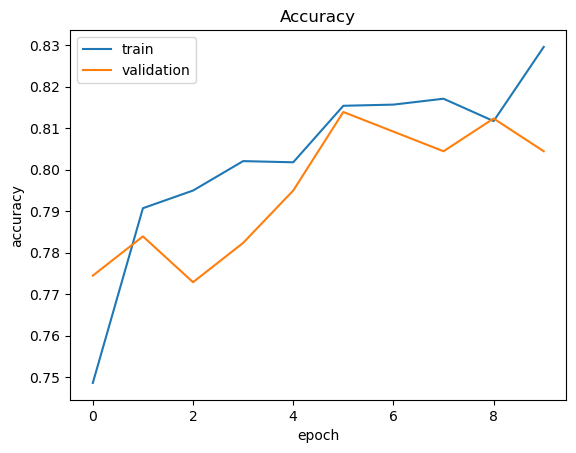

In [97]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
